## 以下針對訓練資料中實驗配對分成訓練集、驗證集和測試集並依陰陽性可視化。

## 用以觀察訓練資料的分布和評估與訓練結果的相關性

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
p = []

with open('./GPCR_dev_ori.txt') as f:
    for line in f.readlines():
        if line.split(' ')[1] not in p:
            p.append(line.split(' ')[1])
    
with open('./GPCR_train_ori.txt') as f:
    for line in f.readlines():
        if line.split(' ')[1] not in p:
            p.append(line.split(' ')[1])
        
with open('./GPCR_test.txt') as f:
    for line in f.readlines():
        if line.split(' ')[1] not in p:
            p.append(line.split(' ')[1])

In [29]:
mole = []

with open('./GPCR_dev_ori.txt') as f:
    for line in f.readlines():
        if line.split(' ')[0] not in mole:
            mole.append(line.split(' ')[0])
    
with open('./GPCR_train_ori.txt') as f:
    for line in f.readlines():
        if line.split(' ')[0] not in mole:
            mole.append(line.split(' ')[0])
        
with open('./GPCR_test.txt') as f:
    for line in f.readlines():
        if line.split(' ')[0] not in mole:
            mole.append(line.split(' ')[0])

In [31]:
len(mole)

5359

In [4]:
df = pd.DataFrame(p, columns=['protein'])
df['train_1'] = 0
df['train_0'] = 0
df['dev_1'] = 0
df['dev_0'] = 0
df['test_1'] = 0
df['test_0'] = 0
df

,protein,train_1,train_0,dev_1,dev_0,test_1,test_0
0,MKGNSTLATTSKNITSGLHFGLVNISGNNESTLNCSQKPSDKHLDA...,0,0,0,0,0,0
1,MKDNFSFAATSRNITSSLPFDNLNATGTNESAFNCSHKPADKHLEA...,0,0,0,0,0,0
2,MSTPGVNSSASLSPDRLNSPVTIPAVMFIFGVVGNLVAIVVLCKSR...,0,0,0,0,0,0
3,MEDFNMESDSFEDFWKGEDLSNYSYSSTLPPFLLDAAPCEPESLEI...,0,0,0,0,0,0
4,MQPLRSLCGRALVALIFACGVAGVQSEERGFPPAGATPPALRTGEI...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
351,MAGVVHVSLAALLLLPMAPAMHSDCIFKKEQAMCLEKIQRANELMG...,0,0,0,0,0,0
352,MVPEPGPVNSSTPAWGPGPPPAPGGSGWVAAALCVVIVLTAAANSL...,0,0,0,0,0,0
353,MGNSSATGDGGLLAGRGPESLGTGTGLGGAGAAALVGGVLLIGMVL...,0,0,0,0,0,0
354,MPANLTEGSFHANQTVPMLDSSPVACTEIVTFTEALEAEEWGSFYS...,0,0,0,0,0,0


In [5]:
dft = df.set_index('protein').T
dft

protein,MKGNSTLATTSKNITSGLHFGLVNISGNNESTLNCSQKPSDKHLDAIPILYYIIFVIGFLVNIVVVTLFCCQKGPKKVSSIYIFNLAVADLLLLATLPLWATYYSYRYDWLFGPVMCKVFGSFLTLNMFASIFFITCMSVDRYQSVIYPFLSQRRNPWQASYIVPLVWCMACLSSLPTFYFRDVRTIEYLGVNACIMAFPPEKYAQWSAGIALMKNILGFIIPLIFIATCYFGIRKHLLKTNSYGKNRITRDQVLKMAAAVVLAFIICWLPFHVLTFLDALAWMGVINSCEVIAVIDLALPFAILLGFTNSCVNPFLYCFVGNRFQQKLRSVFRVPITWLQGKRESMSCRKSSSLREMETFVS,MKDNFSFAATSRNITSSLPFDNLNATGTNESAFNCSHKPADKHLEAIPVLYYMIFVIGFAVNIVVVSLFCCQKGPKKVSSIYIFNLAVADLLLLATLPLWATYYSYRYDWLFGPVMCKVFGSFLTLNMFASIFFITCMSVDRYQSVIYPFLSQRRNPWQASYVVPLVWCMACLSSLPTFYFRDVRTIEYLGVNACIMAFPPEKYAQWSAGIALMKNILGFIIPLIFIATCYFGIRKHLLKTNSYGKNRITRDQVLKMAAAVVLAFIICWLPFHVLTFLDALTWMGIINSCEVIAVIDLALPFAILLGFTNSCVNPFLYCFVGNRFQQKLRSVFRVPITWLQGKRETMSCRKSSSLREMDTFVS,MSTPGVNSSASLSPDRLNSPVTIPAVMFIFGVVGNLVAIVVLCKSRKEQKETTFYTLVCGLAVTDLLGTLLVSPVTIATYMKGQWPGGQPLCEYSTFILLFFSLSGLSIICAMSVERYLAINHAYFYSHYVDKRLAGLTLFAVYASNVLFCALPNMGLGSSRLQYPDTWCFIDWTTNVTAHAAYSYMYAGFSSFLILATVLCNVLVCGALLRMHRQFMRRTSLGTEQHHAAAAASVASRGHPAASPALPRLSDFRRRRSFRRIAGAEIQMVILLIATSLVVLICSIPLVVRVFVNQLYQPSLEREVSKNPDLQAIRIASVNPILDPWIYILLRKTVLSKAIEKIKCLFCRIGGSRRERSGQHCSDSQRTSSAMSGHSRSFISRELKEISSTSQTLLPDLSLPDLSENGLGGRNLLPGVPGMGLAQEDTTSLRTLRISETSDSSQGQDSESVLLVDEAGGSGRAGPAPKGSSLQVTFPSETLNLSEKCI,MEDFNMESDSFEDFWKGEDLSNYSYSSTLPPFLLDAAPCEPESLEINKYFVVIIYALVFLLSLLGNSLVMLVILYSRVGRSVTDVYLLNLALADLLFALTLPIWAASKVNGWIFGTFLCKVVSLLKEVNFYSGILLLACISVDRYLAIVHATRTLTQKRYLVKFICLSIWGLSLLLALPVLLFRRTVYSSNVSPACYEDMGNNTANWRMLLRILPQSFGFIVPLLIMLFCYGFTLRTLFKAHMGQKHRAMRVIFAVVLIFLLCWLPYNLVLLADTLMRTQVIQETCERRNHIDRALDATEILGILHSCLNPLIYAFIGQKFRHGLLKILAIHGLISKDSLPKDSRPSFVGSSSGHTSTTL,MQPLRSLCGRALVALIFACGVAGVQSEERGFPPAGATPPALRTGEIVAPPTKTFWPRGSNASLPRSSSPPQMPKGGRMAGPPARTLTPPPCEGPIEIKDTFKYINTVVSCLVFVLGIIGNSTLLRIIYKNKCMRNGPNILIASLALGDLLHIIIDIPINVYKLLAEDWPFGVEMCKLVPFIQKASVGITVLSLCALSIDRYRAVASWSRIKGIGVPKWTAVEIVLIWVVSVVLAVPEALGFDMITTDYKGNRLRICLLHPTQKTAFMQFYKTAKDWWLFSFYFCLPLAITAFFYTLMTCEMLRKKSGMQIALNDHLKQRREVAKTVFCLVLVFALCWLPLHLSRILKLTLYDQNDSNRCELLSFLLVLDYIGINMASLNSCINPIALYLVSKRFKNCFKSCLCCWCQSFEEKQSLEEKQSCLKFKANDHGYDNFRSSNKYSSS,METLCLRASFWLALVGCVISDNPERYSTNLSNHVDDFTTFRGTELSFLVTTHQPTNLVLPSNGSMHNYCPQQTKITSAFKYINTVISCTIFIVGMVGNATLLRIIYQNKCMRNGPNALIASLALGDLIYVVIDLPINVFKLLAGRWPFDHNDFGVFLCKLFPFLQKSSVGITVLNLCALSVDRYRAVASWSRVQGIGIPLVTAIEIVSIWILSFILAIPEAIGFVMVPFEYRGEQHKTCMLNATSKFMEFYQDVKDWWLFGFYFCMPLVCTAIFYTLMTCEMLNRRNGSLRIALSEHLKQRREVAKTVFCLVVIFALCWFPLHLSRILKKTVYNEMDKNRCELLSFLLLMDYIGINLATMNSCINPIALYFVSKKFKNCFQSCLCCCCYQSKSLMTSVPMNGTSIQWKNHDQNNHNTDRSSHKDSMN,MQSSASRCGRALVALLLACGLLGVWGEKRGFPPAQATPSLLGTKEVMTPPTKTSWTRGSNSSLMRSSAPAEVTKGGRVAGVPPRSFPPPCQRKIEINKTFKYINTIVSCLVFVLGIIGNSTLLRIIYKNKCMRNGPNILIASLALGDLLHIIIDIPINAYKLLAGDWPFGAEMCKLVPFIQKASVGITVLSLCALSIDRYRAVASWSRIKGIGVPKWTAVEIVLIWVVSVVLAVPEAIGFDVITSDYKGKPLRVCMLNPFQKTAFMQFYKTAKDWWLFSFYFCLPLAITAIFYTLMTCEMLRKKSGMQIALNDHLKQRREVAKTVFCLVLVFALCWLPLHLSRILKLTLYDQSNPQRCELLSFLLVLDYIGINMASLNSCINPIALYLVSKRFKNCFKSCLCCWCQTFEEKQSLEEKQSCLKFKANDHGYDNFRSSNKYSSS,MDILCEENTSLSSTTNSLMQLNDDTRLYSNDFNSGEANTSDAFNWTVDSENRTNLSCEGCLSPSCLSLLHLQEKNWSALLTAVVIILTIAGNILVIMAVSLEKKLQNATNYFLMSLAIADMLLGFLVMPVSMLTILYGYRWPLPSKLCAVWIYLDVLFSTASIMHLCAISLDRYVAIQNPIHHSRFNSRTKAFLKIIAVWTISVGISMPIPVFGLQDDSKVFKEGSCLLADDNFVLIGSFVSFFIPLTIMVITYFLTIKSLQKEATLCVSDLGTRAKLASFSFLPQSSLSSEKLFQRSIHREPGSYTGRRTMQSISNEQKACKVLGIVFFLFVVMWCPFFITNIMAVICKESCNEDVIGALLNVFVWIGYLSSAVNPLVYTLFNKTYRSAFSRYIQCQYKENKKPLQLILVNTIPALAYKSSQLQMGQKKNSKQDAKTTDNDCSMVALGKQHSEEASKDNSDGVNEKVSCV,MVNLRNAVHSFLVHLIGLLVWQCDISVSPVAAIVTDIFNTSDGGRFKFPDGVQNWPALSIVIIIIMTIGGNILVIMAVSMEKKLHNATNYFLMSLAIADMLVGLLVMPLSLLAILYDYVWPLPRYLCPVWISLDVLFSTASIMHLCAISLDRYVAIRNPIEHSRFNSRTKAIMKIAIVWAISIGVSVPIPVIGLRDEEKVFVNNTTCVLNDPNFVLIGSFVAFFIPLTIMVITYCLTIYVLRRQALMLLHGHTEEPPGLSLDFLKCCKRNTAEEENSANPNQDQNARRRKKKERRPRGTMQAINNERKASKVLGIVFFVFLIMWCPFFITNILSVLCEKSCNQKLMEKLLNVFVWIGYVCSGINPLVYTLFNKIYRRAFSNYLRCNYKVEKKPPVRQIPRVAATALSGRELNVNIYRHTNEPVIEKASDNEPGIEMQVENLELPVNPSSVVSERISSV,MSVGAMKKGVGRAVGLGGGSGCQATEEDPLPNCGACAPGQGGRRWRLPQPAWVEGSSARLWEQATGTGWMDLEASLLPTGPNASNTSDGPDNLTSAGSPPRTGSISYINIIMPSVFGTICLLGIIGNSTVIFAVVKKSKLHWCNNVPDIFIINLSVVDLLFLLGMPFM

In [6]:
with open('./GPCR_train_ori.txt') as f:
    for line in f.readlines():
        p = line.split(' ')[1]
        a = line.split(' ')[2].strip('\n')
        if a == '1':
            dft.loc['train_1', p] = dft.loc['train_1', p] + 1
        else:
            dft.loc['train_0', p] = dft.loc['train_0', p] + 1

In [7]:
with open('./GPCR_dev_ori.txt') as f:
    for line in f.readlines():
        p = line.split(' ')[1]
        a = line.split(' ')[2].strip('\n')
        if a == '1':
            dft.loc['dev_1', p] = dft.loc['dev_1', p] + 1
        else:
            dft.loc['dev_0', p] = dft.loc['dev_0', p] + 1

In [8]:
with open('./GPCR_test.txt') as f:
    for line in f.readlines():
        p = line.split(' ')[1]
        a = line.split(' ')[2].strip('\n')
        if a == '1':
            dft.loc['test_1', p] = dft.loc['test_1', p] + 1
        else:
            dft.loc['test_0', p] = dft.loc['test_0', p] + 1

In [10]:
dftt = dft.T.reset_index()

In [28]:
dftt.sum()

protein    MKGNSTLATTSKNITSGLHFGLVNISGNNESTLNCSQKPSDKHLDA...
train_1                                                 5823
train_0                                                 5221
dev_1                                                   1414
dev_0                                                   1348
test_1                                                   752
test_0                                                   785
dtype: object

In [21]:
def draw_pic2(df):
    df1 = df.sort_values(['train_1'],ascending=False) #sort with whitch column
    df0 = df.sort_values(['train_0'],ascending=False) #sort with whitch column
    
    column_name = []
    protein = []
    train = [[], []]
    dev = [[], []]
    test = [[], []]
    
    for n in df.columns:
        column_name.append(n)
        
        
    for i in df1[column_name[0]]:
        protein.append(str(i))
    for i in df1[column_name[1]]:
        train[0].append(i)
    for i in df0[column_name[2]]:
        train[1].append(-i)
    for i in df1[column_name[3]]:
        dev[0].append(i)
    for i in df0[column_name[4]]:
        dev[1].append(-i)
    for i in df1[column_name[5]]:
        test[0].append(i)
    for i in df0[column_name[6]]:
        test[1].append(-i)
        
    width = 30  # the width of the bars
    pos = width/2
    x = np.array([i*60 for i in range(len(protein))]) # the label locations

    fig, ax = plt.subplots()
    # positive
    rects1 = ax.bar(x - pos, train[0], width, label='train', color='orange')
    rects2 = ax.bar(x - pos, dev[0], width, label='dev', color='turquoise', bottom=train[0])
    rects3 = ax.bar(x + pos, test[0], width, label='test', color='grey')
    # negative
    rects4 = ax.bar(x - pos, train[1], width, label='train', color='orange')
    rects5 = ax.bar(x - pos, dev[1], width, label='dev', color='turquoise', bottom=train[1])
    rects6 = ax.bar(x + pos, test[1], width, label='test', color='grey')
    
    fig.set_figwidth(20)
    fig.set_figheight(10)
    
    ax.axhline(0, color='grey', linewidth=0.8) # zero line
    
    ax.legend(handles=[rects1, rects2, rects3], markerscale=5, fontsize=25)

    # title and y axis
    ax.set_ylabel('Count', fontsize=25)
    ax.tick_params(labelsize=20)
    ax.set_xticks([])
    #ax.set_title('positive and negative pair of protein in defferent set')

    plt.show()

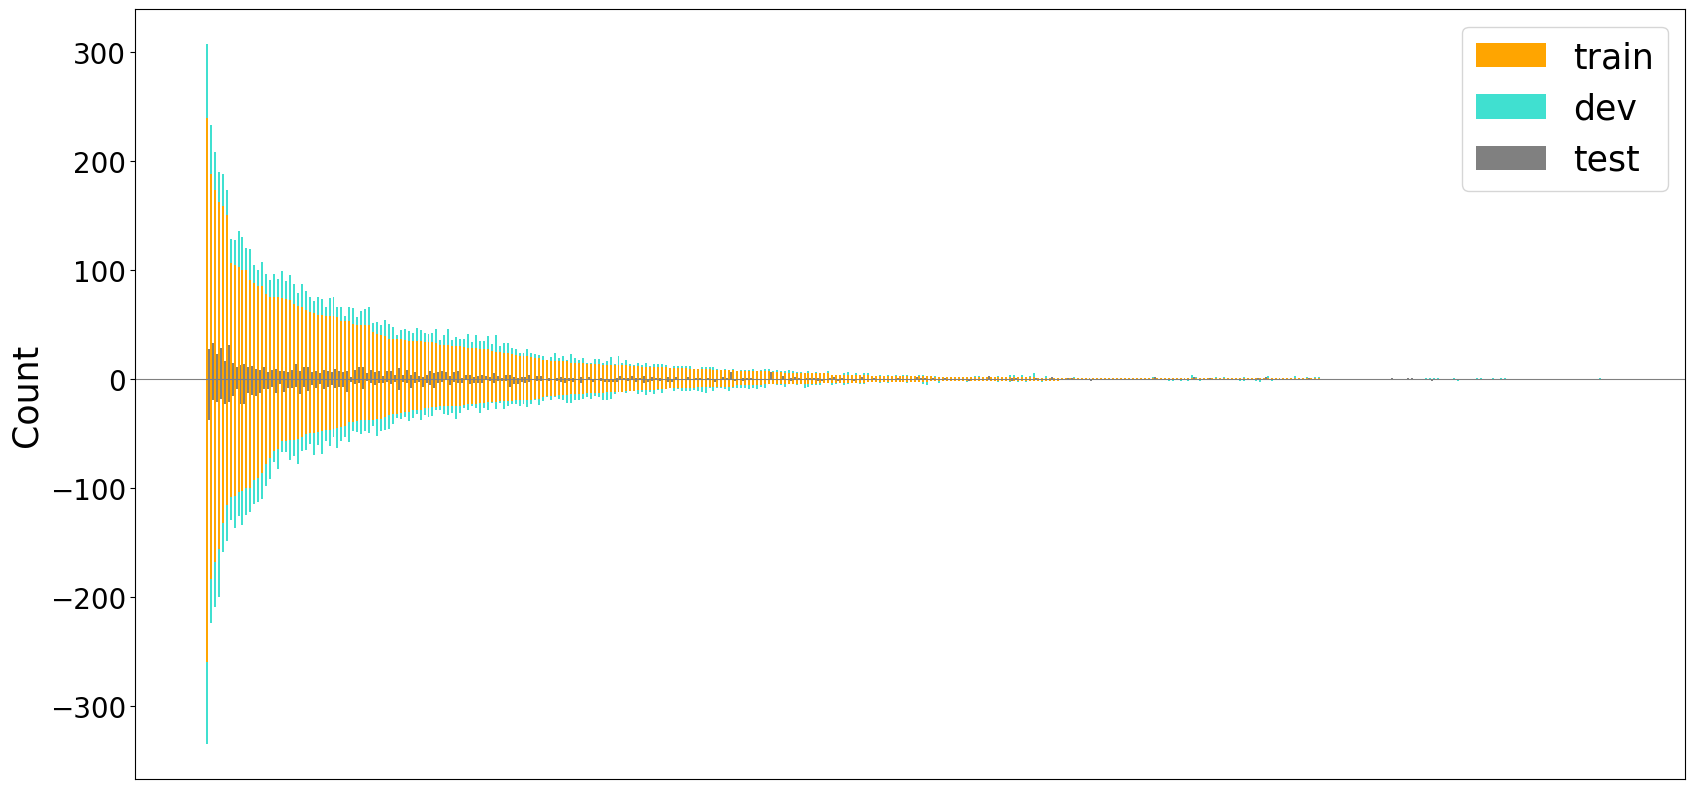

In [22]:
draw_pic2(dftt)